In [81]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [21]:
url = "https://www.openml.org/data/download/22102255/dataset"
data = requests.get(url)

In [38]:
with open('dataset.txt','wb') as f:
    f.write(data.content)

In [4]:
dataset = []

with open("dataset.txt","r") as f:
    for line in f.read().split("\n"):
        if (line.startswith("@") or line.startswith("%") or line == ""):
            continue
        dataset.append(line)

In [40]:
dataset

['175.0,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT',
 '156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT',
 '96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.

In [2]:
columns = []

with open("dataset.txt","r") as f:
    for line in f.read().split("\n"):
        if line.startswith("@ATTRIBUTE"):
            columns.append(line.split(" ")[1])

In [42]:
columns

['time_left',
 'ct_score',
 't_score',
 'map',
 'bomb_planted',
 'ct_health',
 't_health',
 'ct_armor',
 't_armor',
 'ct_money',
 't_money',
 'ct_helmets',
 't_helmets',
 'ct_defuse_kits',
 'ct_players_alive',
 't_players_alive',
 'ct_weapon_ak47',
 't_weapon_ak47',
 'ct_weapon_aug',
 't_weapon_aug',
 'ct_weapon_awp',
 't_weapon_awp',
 'ct_weapon_bizon',
 't_weapon_bizon',
 'ct_weapon_cz75auto',
 't_weapon_cz75auto',
 'ct_weapon_elite',
 't_weapon_elite',
 'ct_weapon_famas',
 't_weapon_famas',
 'ct_weapon_g3sg1',
 't_weapon_g3sg1',
 'ct_weapon_galilar',
 't_weapon_galilar',
 'ct_weapon_glock',
 't_weapon_glock',
 'ct_weapon_m249',
 't_weapon_m249',
 'ct_weapon_m4a1s',
 't_weapon_m4a1s',
 'ct_weapon_m4a4',
 't_weapon_m4a4',
 'ct_weapon_mac10',
 't_weapon_mac10',
 'ct_weapon_mag7',
 't_weapon_mag7',
 'ct_weapon_mp5sd',
 't_weapon_mp5sd',
 'ct_weapon_mp7',
 't_weapon_mp7',
 'ct_weapon_mp9',
 't_weapon_mp9',
 'ct_weapon_negev',
 't_weapon_negev',
 'ct_weapon_nova',
 't_weapon_nova',
 'ct_w

In [5]:
with open("CSGO.csv","w") as f:
    f.write(",".join(columns))
    f.write("\n")
    f.write("\n".join(dataset))

In [6]:
df = pd.read_csv('CSGO.csv')

In [7]:
df.shape

(122410, 97)

In [8]:
df["round_winner"] = df.round_winner.astype('category').cat.codes

In [9]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,1
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1


In [10]:
df['map'] = df.map.astype('category').cat.codes
df['bomb_planted'] = df.bomb_planted.astype('category').cat.codes

In [55]:
correlation = df.corr()['round_winner']

selected_columns = correlation[(abs(correlation) > 0.005)].index.tolist()

df_selected = df[selected_columns]
df_selected.shape

(122410, 78)

In [56]:
klib.corr_mat(df_selected,colored=True)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,t_weapon_mac10,ct_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,t_weapon_nova,ct_weapon_p90,t_weapon_p90,t_weapon_r8revolver,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
time_left,1.00,0.00,-0.00,0.01,-0.49,0.68,0.68,-0.09,-0.20,0.37,0.34,-0.10,-0.25,-0.06,0.64,0.60,-0.00,-0.17,-0.03,-0.02,-0.07,-0.12,-0.04,-0.04,0.01,-0.01,-0.05,-0.02,0.01,-0.01,-0.06,0.01,0.52,-0.04,-0.01,-0.14,-0.05,-0.04,-0.01,-0.00,-0.02,-0.01,-0.04,-0.03,-0.00,-0.00,-0.00,-0.00,0.01,-0.14,-0.05,-0.04,-0.03,-0.01,-0.07,-0.08,-0.04,0.00,0.52,-0.03,-0.05,-0.03,0.11,-0.01,0.00,0.12,0.05,0.01,0.01,0.11,0.04,0.13,0.00,0.06,0.04,0.01,0.02,-0.07
ct_score,0.00,1.00,0.63,-0.00,-0.02,0.02,-0.01,0.10,0.03,0.25,0.07,0.18,0.06,0.25,0.01,-0.02,0.08,0.05,0.05,-0.01,0.21,0.11,0.01,0.02,0.02,0.00,-0.04,-0.03,0.02,-0.02,-0.04,-0.01,0.02,0.07,-0.00,0.12,-0.01,-0.08,-0.01,-0.01,-0.01,-0.02,-0.04,-0.03,-0.00,-0.00,-0.00,-0.00,0.09,0.07,-0.10,-0.03,-0.06,-0.00,-0.02,-0.00,0.03,-0.02,-0.03,-0.14,0.14,0.01,-0.01,-0.03,0.01,0.12,-0.01,0.17,0.05,0.14,0.04,0.15,0.01,0.05,0.06,-0.01,-0.00,-0.06
t_score,-0.00,0.63,1.00,-0.00,-0.01,0.00,0.00,0.04,0.08,0.07,0.26,-0.01,0.14,0.06,0.00,-0.00,0.00,0.10,0.01,-0.00,0.15,0.17,0.01,0.01,-0.01,0.03,-0.02,-0.02,0.03,-0.03,-0.04,-0.03,-0.02,0.06,0.00,0.09,-0.00,-0.05,0.02,0.00,-0.02,-0.01,-0.07,-0.03,0.00,0.01,-0.00,-0.00,-0.01,0.11,-0.06,-0.03,-0.03,0.02,-0.04,-0.01,0.04,0.02,-0.00,-0.05,0.05,0.09,0.02,-0.00,-0.04,0.03,0.08,0.06,0.12,0.06,0.10,0.05,0.01,0.03,0.14,0.02,-0.03,0.03
map,0.01,-0.00,-0.00,1.00,-0.03,-0.00,-0.01,0.00,-0.01,0.02,-0.03,0.02,-0.02,-0.00,-0.00,-0.01,-0.00,-0.02,-0.00,-0.01,-0.04,-0.07,-0.04,-0.04,-0.00,0.01,-0.00,0.00,-0.02,0.00,0.04,0.02,0.02,0.00,-0.01,0.02,-0.01,-0.03,0.00,-0.00,-0.01,-0.01,0.01,0.00,0.01,-0.01,-0.00,-0.00,0.04,0.04,-0.02,-0.01,-0.00,0.00,0.01,-0.00,-0.02,-0.01,0.00,-0.02,-0.00,-0.04,0.02,-0.01,0.01,0.01,0.05,0.01,0.02,0.04,-0.01,0.01,0.00,-0.00,-0.01,-0.00,-0.01,-0.04
bomb_planted,-0.49,-0.02,-0.01,-0.03,1.00,-0.62,-0.45,-0.28,-0.10,-0.19,-0.13,-0.18,-0.05,-0.15,-0.62,-0.40,-0.04,-0.03,-0.05,0.02,-0.09,0.01,-0.04,-0.01,-0.01,-0.00,-0.06,0.01,-0.01,-0.00,-0.01,-0.02,-0.27,-0.04,0.01,-0.15,0.06,-0.02,-0.01,-0.01,0.01,0.00,-0.07,0.02,-0.00,-0.00,-0.00,-0.00,-0.04,-0.02,-0.02,-0.03,-0.00,-0.02,-0.06,-0.04,-0.02,0.01,-0.38,0.03,-0.06,-0.04,-0.08,0.01,-0.01,-0.20,-0.12,-0.23,-0.20,-0.22,-0.23,-0.19,0.02,-0.02,-0.22,-0.03,-0.02,0.19
ct_health,0.68,0.02,0.00,-0.00,-0.62,1.00,0.76,0.39,0.14,0.31,0.22,0.23,0.05,0.21,0.97,0.68,0.07,0.03,0.06,-0.02,0.13,-0.03,0.05,0.03,0.02,-0.00,0.06,-0.03,0.01,0.00,0.02,0.02,0.47,0.05,-0.01,0.18,-0.06,0.03,0.01,0.00,-0.00,0.01,0.08,-0.04,0.01,0.00,0.01,0.01,0.07,0.01,0.02,0.04,0.01,0.02,0.07,0.04,0.02,-0.01,0.62,-0.02,0.07,0.05,0.13,-0.01,0.02,0.30,0.16,0.33,0.25,0.34,0.27,0.30,-0.02,0.05,0.26,0.05,0.03,-0.19
t_health,0.68,-0.01,0.00,-0.01,-0.45,0.76,1.00,0.17,0.33,0.24,0.31,0.05,0.22,0.05,0.70,0.96,-0.02,0.14,0.02,-0.00,0.01,0.05,0.03,0.04,0.01,0.0

array([[<AxesSubplot:title={'center':'time_left'}>,
        <AxesSubplot:title={'center':'ct_score'}>,
        <AxesSubplot:title={'center':'t_score'}>,
        <AxesSubplot:title={'center':'map'}>,
        <AxesSubplot:title={'center':'bomb_planted'}>,
        <AxesSubplot:title={'center':'ct_health'}>,
        <AxesSubplot:title={'center':'t_health'}>,
        <AxesSubplot:title={'center':'ct_armor'}>,
        <AxesSubplot:title={'center':'t_armor'}>],
       [<AxesSubplot:title={'center':'ct_money'}>,
        <AxesSubplot:title={'center':'t_money'}>,
        <AxesSubplot:title={'center':'ct_helmets'}>,
        <AxesSubplot:title={'center':'t_helmets'}>,
        <AxesSubplot:title={'center':'ct_defuse_kits'}>,
        <AxesSubplot:title={'center':'ct_players_alive'}>,
        <AxesSubplot:title={'center':'t_players_alive'}>,
        <AxesSubplot:title={'center':'ct_weapon_ak47'}>,
        <AxesSubplot:title={'center':'t_weapon_ak47'}>],
       [<AxesSubplot:title={'center':'ct_weapon

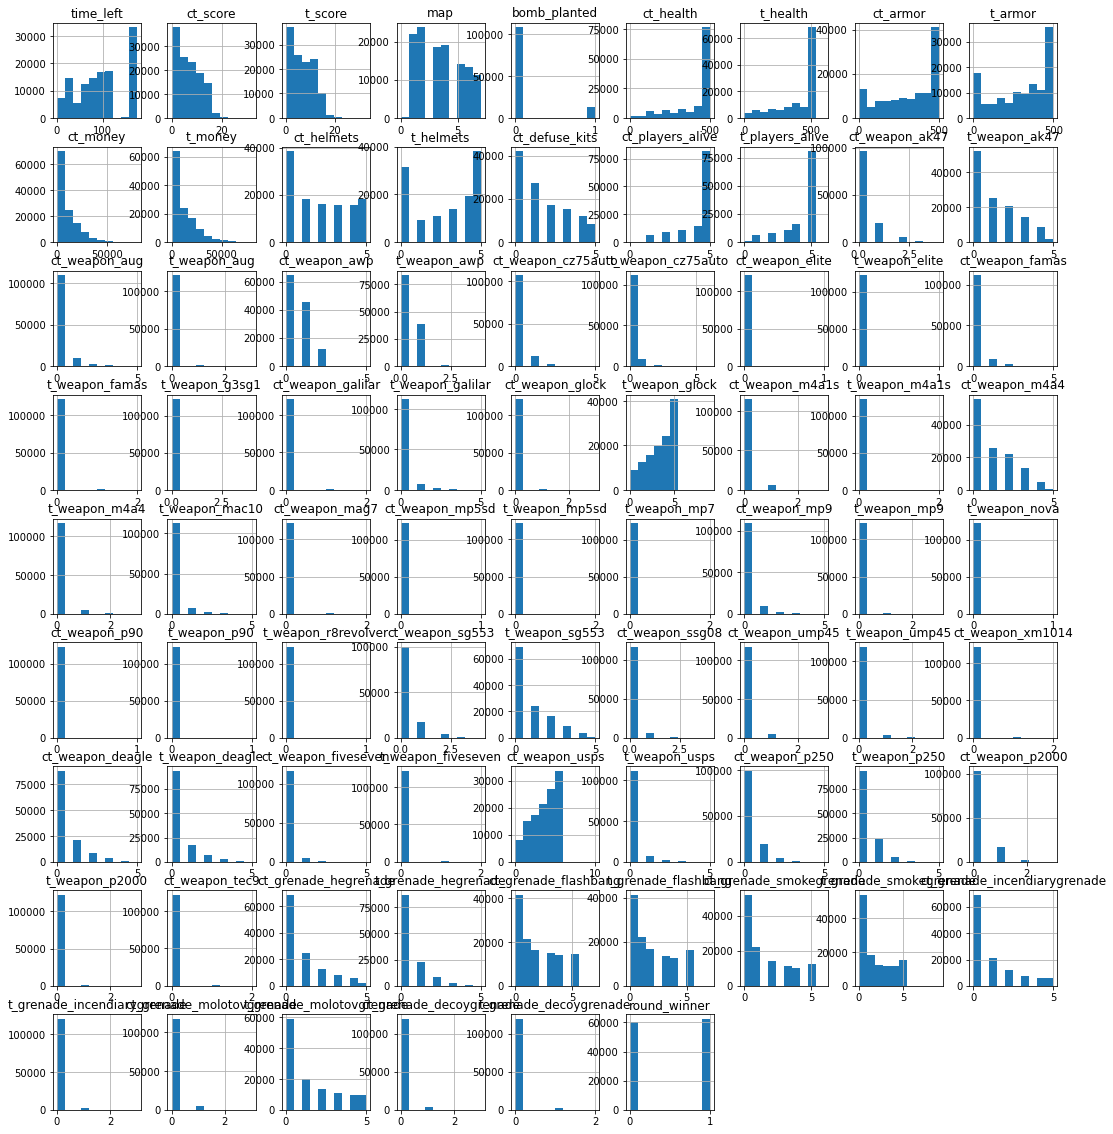

In [57]:
df_selected.hist(figsize=(18,20))

In [60]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 78 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  int8   
 4   bomb_planted                  122410 non-null  int8   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [61]:
x,y = df_selected.drop(["round_winner"],axis=1),df.round_winner

In [62]:
x

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,1.0,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0


In [63]:
y

0         0
1         0
2         0
3         0
4         0
         ..
122405    1
122406    1
122407    1
122408    1
122409    1
Name: round_winner, Length: 122410, dtype: int8

In [64]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [65]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
model = RandomForestClassifier(n_jobs=4)
model.fit(X_train_scaled,y_train)

RandomForestClassifier(n_jobs=4)

In [67]:
model.score(X_test_scaled,y_test)

0.8785638428232988

In [68]:
X_train.shape

(97928, 77)

In [74]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(77,)))
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))

In [75]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [78]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)

X_train_scaled_train,X_valid,y_train_train,y_valid = train_test_split(X_train_scaled,y_train,test_size=0.15)

In [79]:
model.fit(X_train_scaled_train,y_train_train,epochs=30,
          callbacks=[early_stopping_cb],
          validation_data=(X_valid,y_valid))


Epoch 1/30
2602/2602 [==============================] - 3s 961us/step - loss: 0.2640 - accuracy: 0.8824 - val_loss: 0.2663 - val_accuracy: 0.8836
Epoch 2/30
2602/2602 [==============================] - 2s 954us/step - loss: 0.2455 - accuracy: 0.8889 - val_loss: 0.2806 - val_accuracy: 0.8729
Epoch 3/30
2602/2602 [==============================] - 2s 957us/step - loss: 0.2337 - accuracy: 0.8954 - val_loss: 0.2928 - val_accuracy: 0.8712
Epoch 4/30
2602/2602 [==============================] - 2s 957us/step - loss: 0.2243 - accuracy: 0.8992 - val_loss: 0.2866 - val_accuracy: 0.8742
Epoch 5/30
2602/2602 [==============================] - 2s 955us/step - loss: 0.2135 - accuracy: 0.9035 - val_loss: 0.2981 - val_accuracy: 0.8712
Epoch 6/30
2602/2602 [==============================] - 2s 955us/step - loss: 0.2061 - accuracy: 0.9078 - val_loss: 0.3167 - val_accuracy: 0.8717
Epoch 7/30
2602/2602 [==============================] - 3s 964us/step - loss: 0.1996 - accuracy: 0.9115 - val_loss: 0.3155 -

In [80]:
model.evaluate(X_test_scaled,y_test)

766/766 [==============================] - 0s 560us/step - loss: 0.4784 - accuracy: 0.8410


[0.4784007966518402, 0.8410260677337646]